In [1]:
# Libraries

import pandas as pd
import plotly.express as px
import streamlit as st

In [2]:
df= pd.read_csv('male_players.csv')
df= df.drop(labels=['Unnamed: 0','URL','Gender'],axis=1)
df['GK']=df['GK'].fillna(0)
df['Weak foot']=df['Weak foot']*20
df['Skill moves']=df['Skill moves']*20
df['GK']=df['GK'].astype(int)

list_nations=df['Nation'].unique()
list_club=df['Club'].unique()
list_player=df['Name'].unique()

df_head=df.head()

# Nation and player slection


## Nation

In [4]:
# Select a Nation
nation=st.selectbox('Choose a nation',list_nations)
def select_nation(nation:str):
    '''Return the dataframe of the Nation
    Return a graph with the stat choosen by the user
    Return The player oof this nation with his stats
    Return a grpah for the player and stst choosen by the user.
    Take in argument the nation'''
    
    df_nation= df[df['Nation']==nation]
    df_nation=df_nation.reset_index().drop(columns='index')
    st.dataframe(df_nation)
    return df_nation

2024-06-26 13:29:25.308 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-06-26 13:29:25.367 
  command:

    streamlit run /home/j/Desktop/FC24_API/venv/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
france=select_nation('France')

## Player

In [5]:
# Select a Player from a Specific nation

def select_player_nation(df_nation):
    '''Return the player from a specifice nation
    Takes in argument the dataframe of the Nation selected previously'''
    players_nation=df_nation['Name'].unique()
    player_nation=st.selectbox('Player from Nation',players_nation)
    df_player_nation=df_nation[df_nation['Name']==player_nation]
    df_player_nation=df_player_nation.reset_index().drop(columns='index')
    st.dataframe(df_player_nation)
    return df_player_nation, player_nation

# Plot the player_nation

In [6]:
def plot_player_nation(dataframe_player_nation,player_nation):
    '''plot the bar graph for a specific player of a specific nation
    Take in arguments a dataframe of a specific nation and a player name'''
    dataframe_player_nation=dataframe_player_nation.select_dtypes(include=int)
    df_long=pd.melt(dataframe_player_nation,var_name='Stat_Name',value_name='Value')
    fig=px.bar(df_long,x='Stat_Name',y='Value',title=player_nation)
    fig.update_xaxes(tickangle=45)
    return fig

# PLot Player radar graph

In [7]:
def player_radar(df,player_name,list_cat):
    '''Return a polar graph for a specific player and stats choosen by the user
    Takes in argument a dateframe, a player, and list of stats'''
    df_player=df[df['Name']==player_name]
    df_player_cat=df_player[list_cat]
    df_player_long=pd.melt(df_player_cat,var_name='Stat_Name',value_name='Value')
    fig = px.line_polar(df_player_long, r='Value', theta='Stat_Name', line_close=True)
    fig.update_traces(fill='toself')
    return fig




In [ ]:
france_player=select_player_nation(france)
france_player=france_player.select_dtypes(include=int)
france_player

In [ ]:
df_long= pd.melt(france_player,var_name='Stat_Name',value_name='Value')
df_long

In [ ]:
px.bar(df_long,x='Stat_Name',y='Value',title='Name')

In [ ]:
france_player.select_dtypes(include=int).columns

In [ ]:
# Select the stat of the player to plot
stats_player_nation=st.multiselect('Stat to Display',france_player.select_dtypes(include=int).columns)
def nation_player_stat(df_player_nation,stats_player_nation:list):
    name_player=df_player_nation['Name']
    df_player_nation=df_player_nation.select_dtypes(include=int)
    

    
    

# Club and player Selection

In [5]:
# Select a club
club= st.selectbox('Club to select',list_club)
def select_club(club:str):
    '''Returns The club roster from the user selection
    Takes in argument a club '''
    df_club= df[df['Club']==club]
    df_club=df_club.reset_index().drop(columns='index')
    st.dataframe(df_club)
    return df_club


2024-06-26 19:47:50.130 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-06-26 19:47:50.145 
  command:

    streamlit run /home/j/Desktop/FC24_API/venv/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [34]:
# Radar Club
club='Paris SG'
df_club= select_club(club)
#do the average
df_club2=df_club.select_dtypes(include=int)
df_club_median=df_club2.median(axis=0)

df_club_median=df_club_median.to_frame()#.rename(columns={0:'Value'})
#df_club_median['Stat_Name']=df_club2.columns
df_club_median=df_club_median.reset_index().rename(columns={'index':'Stat_Name',
                                             0:'Value'})

In [35]:
df_club_median

,Stat_Name,Value
0,Age,24.5
1,Overall,81.0
2,Pace,77.0
3,Shooting,71.0
4,Passing,73.0
5,Dribbling,76.0
6,Defending,63.0
7,Physicality,72.5
8,Acceleration,74.0
9,Sprint,76.5


In [36]:
fig = px.line_polar(df_club_median, r='Value', theta='Stat_Name', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
def club_selection_radar(club):
    '''Return the Radar graph of a club doing the median of all the players
    Takes in argument a player'''
    df_club= select_club(club)
    df_club2=df_club.select_dtypes(include=int)
    df_club_median=df_club2.median(axis=0) # Axis is 0!!!
    df_club_median=df_club_median.to_frame()
    df_club_median=df_club_median.reset_index().rename(columns={'index':'Stat_Name',
                                                0:'Value'})
    

In [ ]:
def select_club(df,club:str,list_stat):
    '''Returns The club roster from the user selection
    Takes in argument a club '''
    df_club= df[df['Club']==club]
    df_club=df_club.reset_index().drop(columns='index')
    df_club2=df_club.select_dtypes(include=int)
    df_club2=df_club2[list_stat]
    df_club_median=df_club2.median(axis=0) # Axis is 0!!!
    df_club_median=df_club_median.to_frame()
    df_club_median=df_club_median.reset_index().rename(columns={'index':'Stat_Name',
                                                0:'Value'})
    fig = px.line_polar(df_club_median, r='Value', theta='Stat_Name', line_close=True)
    fig.update_traces(fill='toself')

    return df_club,fig

In [9]:
# Select a player from a spceificc club

def select_club_player(df_club):
    '''Returns a dataframe for a specifici player of a speicifc club
    Takes in argument a dataframe for a specific club'''
    players_club= df_club['Name'].unique()
    player_club=st.selectbox('player from Club',players_club)
    df_player_club=df_club[df_club['Name']==player_club]
    df_player_club=df_player_club.reset_index().drop(columns='index')
    st.dataframe(df_player_club)
    return df_player_club

# Nations to compare.
nations_to_compare=[]
d

In [ ]:
nation= input('Which Nation you want to select?')
df_nation=select_nation(nation)

In [ ]:
def select_club(club):
    df_club=df[df['Club']==club]
    return df_club

In [ ]:
club_selection= input('Which Club do you want?')
df_club=select_club(club_selection)
df_club.head()

In [ ]:
df['Nation'].unique()

In [ ]:
df['Club'].unique()

In [ ]:
df

In [ ]:
wide_df = px.data.medals_wide()
wide_df

# Radar Graph for palyer comparsion


In [34]:
def player_radar(df,player_name,list_cat):
    '''Return a polar graph for a specific player and stats choosen by the user
    Takes in argument a dateframe, a player, and list of stats'''
    df_player=df[df['Name']==player_name]
    df_player_cat=df_player[list_cat]
    df_player_long=pd.melt(df_player_cat,var_name='Stat_Name',value_name='Value')
    fig = px.line_polar(df_player_long, r='Value', theta='Stat_Name', line_close=True)
    fig.update_traces(fill='toself')
    return fig

# Club Comparison

In [112]:
club_list=['Paris SG','Manchester City','Real Madrid']
list_cat=['Overall','Shooting','Long']
# def club_comp(df,club_list,list_cat):
#     df_clubs_comp=df[df['Club'].isin(club_list)]
#     list_cat.append('Club')
#     df_clubs_comp=df_clubs_comp[list_cat]
#     df_clubs_comp=df_clubs_comp.reset_index().drop(columns='index')
#     #df_players_comp=df_players_comp.select_dtypes(include=int).columns
#     melt_df=pd.melt(df_clubs_comp,id_vars=['Club'],value_vars=df_clubs_comp.select_dtypes(include=int).columns,var_name='Stats',value_name='Stats_value')
#     fig=px.bar(melt_df,x='Stats',y='Stats_value',color='Club',barmode='group')
#     fig2= px.line_polar(melt_df, r="Stats_value", theta="Stats", color="Club")
#     return fig,fig2
# names_player_comp=df_players_comp['Name'].reset_index().drop(columns='index')
# names_player_comp['Name']
df

,Name,Nation,Club,Position,Age,Overall,Pace,Shooting,Passing,Dribbling,...,Jumping,Stamina,Strength,Aggression,Att work rate,Def work rate,Preferred foot,Weak foot,Skill moves,GK
0,Kylian Mbappé,France,Paris SG,ST,24,91,97,90,80,93,...,88,88,77,64,High,Low,Right,80,100,0
1,Erling Haaland,Norway,Manchester City,ST,23,91,89,93,66,79,...,93,76,93,87,High,Medium,Left,60,60,0
2,Kevin De Bruyne,Belgium,Manchester City,CM,32,91,72,88,94,86,...,72,88,74,75,High,Medium,Right,100,80,0
3,Lionel Messi,Argentina,Inter Miami CF,CF,36,90,80,87,90,96,...,71,70,68,44,Low,Low,Left,80,80,0
4,Karim Benzema,France,Al Ittihad,CF,35,90,79,88,83,87,...,85,82,82,63,Medium,Medium,Right,80,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15840,Deven Sawhney,India,Odisha FC,LB,21,47,62,26,34,41,...,45,57,57,58,High,Medium,Left,60,40,0
15841,Wang Tengda,China PR,Dalian Pro,CM,22,47,61,37,45,45,...,38,56,42,51,Medium,Medium,Right,60,40,0
15842,Wu Yuhang,China PR,Zhejiang Pro,CDM,22,47,56,34,43,43,...,38,49,51,56,Medium,Medium,Right,60,40,0
15843,Ye Daoxin,China PR,Zhejiang Pro,CB,17,47,58,28,33,38,...,38,50,48,46,Medium,Medium,Right,60,40,0


In [113]:
df_clubs_comp=df[df['Club'].isin(club_list)]


list_cat.append('Club')
df_clubs_comp=df_clubs_comp[list_cat]


df_clubs_comp



,Overall,Shooting,Long,Club
0,91,90,71,Paris SG
1,91,93,53,Manchester City
2,91,88,94,Manchester City
5,90,89,35,Real Madrid
9,89,39,76,Manchester City
...,...,...,...,...
11783,62,66,49,Real Madrid
12088,62,32,55,Manchester City
12211,62,60,47,Real Madrid
12800,61,50,63,Real Madrid


In [114]:
df_clubs_comp=df_clubs_comp.groupby(['Club']).median().reset_index()
df_clubs_comp

,Club,Overall,Shooting,Long
0,Manchester City,80.5,66.0,74.0
1,Paris SG,81.0,71.0,71.5
2,Real Madrid,82.0,69.0,74.0


In [115]:
melt_df=pd.melt(df_clubs_comp,id_vars=['Club'],value_vars=df_clubs_comp.select_dtypes(include=float).columns,var_name='Stats',value_name='Stats_value')
melt_df

,Club,Stats,Stats_value
0,Manchester City,Overall,80.5
1,Paris SG,Overall,81.0
2,Real Madrid,Overall,82.0
3,Manchester City,Shooting,66.0
4,Paris SG,Shooting,71.0
5,Real Madrid,Shooting,69.0
6,Manchester City,Long,74.0
7,Paris SG,Long,71.5
8,Real Madrid,Long,74.0


In [116]:
fig=px.bar(melt_df,x='Stats',y='Stats_value',color='Club',barmode='group')
fig2= px.line_polar(melt_df, r="Stats_value", theta="Stats", color="Club")
fig2.show()

In [117]:
def club_comparison(df,clubs_list,list_cat):
    '''Return graphs to compare multiple clubs by the median of their stats
    Take in argument a df, a list of clubs and a list of stat categories'''
    df_clubs_comp=df[df['Club'].isin(clubs_list)]
    list_cat.append('Club')
    df_clubs_comp=df_clubs_comp[list_cat]
    df_clubs_comp=df_clubs_comp.groupby(['Club']).median().reset_index()
    melt_df=pd.melt(df_clubs_comp,id_vars=['Club'],value_vars=df_clubs_comp.select_dtypes(include=float).columns,var_name='Stats',value_name='Stats_value')
    fig=px.bar(melt_df,x='Stats',y='Stats_value',color='Club',barmode='group')
    fig2= px.line_polar(melt_df, r="Stats_value", theta="Stats", color="Club")
    return fig,fig2
    
    

In [90]:
# Take the df with the clubs
df_clubs_comp=df[df['Club'].isin(club_list)]
df_clubs_comp=df_clubs_comp[list_cat]
list_cat.append('Club')

df_clubs_comp=df_clubs_comp.groupby(['Club']).median().reset_index()

df_clubs_comp=df_clubs_comp[list_cat]
df_clubs_comp=df_clubs_comp.reset_index().drop(columns='index')
# df_clubs_comp
#     #df_players_comp=df_players_comp.select_dtypes(include=int).columns
melt_df=pd.melt(df_clubs_comp,id_vars=['Club'],value_vars=df_clubs_comp.select_dtypes(include=int).columns,var_name='Stats',value_name='Stats_value')
melt_df
#  fig=px.bar(melt_df,x='Stats',y='Stats_value',color='Club',barmode='group')
# fig2= px.line_polar(melt_df, r="Stats_value", theta="Stats", color="Club")
# fig2.show()

# Take the median of the category for each club. This mean a groupby.

KeyError: 'Club'

In [ ]:
fig, fig2=club_comp(df,club_list,list_cat)
fig.show()


In [90]:
player_list=['Karim Benzema','Lionel Messi','Pepe']
list_cat=['Overall','Shooting','Long']
def player_comp(df,player_list,list_cat):
    df_players_comp=df[df['Name'].isin(player_list)]
    list_cat.append('Name')
    df_players_comp=df_players_comp[list_cat]
    df_players_comp=df_players_comp.reset_index().drop(columns='index')
    #df_players_comp=df_players_comp.select_dtypes(include=int).columns
    melt_df=pd.melt(df_players_comp,id_vars=['Name'],value_vars=df_players_comp.select_dtypes(include=int).columns,var_name='Stats',value_name='Stats_value')
    fig=px.bar(melt_df,x='Stats',y='Stats_value',color='Name',barmode='group')
    fig2= px.line_polar(melt_df, r="Stats_value", theta="Stats", color="Name")
    return fig,fig2
# names_player_comp=df_players_comp['Name'].reset_index().drop(columns='index')
# names_player_comp['Name']

In [91]:
fig, fig2=player_comp(df,player_list,list_cat)
fig.show()
fig2.show()

In [83]:
player_list=['Karim Benzema','Lionel Messi','Pepe']
list_cat=['Overall','Shooting','Long']
list_cat.append('Name')
df_players_comp=df[df['Name'].isin(player_list)]
df_players_comp=df_players_comp.reset_index().drop(columns='index')
#df_players_comp=df_players_comp.select_dtypes(include=int).columns
df_players_comp
melt_df=pd.melt(df_players_comp,id_vars=['Name'],value_vars=df_players_comp.select_dtypes(include=int).columns,var_name='Stats',value_name='Stats_value')
#px.bar(melt_df,x='Stats',y='Stats_value',color='Name',barmode='group')


In [84]:
df_players_comp=df_players_comp[list_cat]

In [85]:
melt_df=pd.melt(df_players_comp,id_vars=['Name'],value_vars=df_players_comp.select_dtypes(include=int).columns,var_name='Stats',value_name='Stats_value')
melt_df

,Name,Stats,Stats_value
0,Lionel Messi,Overall,90
1,Karim Benzema,Overall,90
2,Pepe,Overall,81
3,Lionel Messi,Shooting,87
4,Karim Benzema,Shooting,88
5,Pepe,Shooting,51
6,Lionel Messi,Long,90
7,Karim Benzema,Long,76
8,Pepe,Long,75


In [79]:
px.line_polar(melt_df, r="Stats_value", theta="Stats", color="Name")

In [72]:
px.bar(melt_df,x='Stats',y='Stats_value',color='Name',barmode='group')

In [73]:
def players_comp_bar(df,player_list,stat_list):
    df_players_comp=df[df['Name'].isin(player_list)]
    df_players_comp=df_players_comp.reset_index().drop(columns='index') 
    df_players_comp=df_players_comp[stat_list]   
    melt_df=pd.melt(df_players_comp,id_vars=['Name'],value_vars=df_players_comp.select_dtypes(include=int).columns,var_name='Stats',value_name='Stats_value')
    fig=px.bar(melt_df,x='Stats',y='Stats_value',color='Name',barmode='group')
    return fig


    

In [74]:
players_comp(df,player_list,list_cat)

In [ ]:
for i in range(len(player_list)):
    df_player=df[df['Name']==player_list[i]]
    df_player_cat=df_player[list_cat]
    df_player_long=pd.melt(df_player_cat,var_name='Stat_Name',value_name='Value')
    px.line_polar(df_player_long, r='Value', theta='Stat_Name', line_close=True)
    

    

    

In [18]:
import plotly.express as px 
import pandas as pd 
import numpy as np 

# Get some data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

# Plot 
df1 = df.melt(id_vars=['Date']+list(df.keys()[5:]), var_name='AAPL')
px.line(df1, x='Date', y='value', color='AAPL' )

In [19]:
df1

,Date,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction,AAPL,value
0,2015-02-17,63152400,122.905254,106.741052,117.927667,129.114281,Increasing,AAPL.Open,127.489998
1,2015-02-18,44891700,123.760965,107.842423,118.940333,130.038244,Increasing,AAPL.Open,127.629997
2,2015-02-19,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing,AAPL.Open,128.479996
3,2015-02-20,48948400,124.510914,109.785449,120.763500,131.741551,Increasing,AAPL.Open,128.619995
4,2015-02-23,70974100,127.876074,110.372516,121.720167,133.067817,Increasing,AAPL.Open,130.020004
...,...,...,...,...,...,...,...,...,...
2019,2017-02-10,20065500,132.119995,114.494004,124.498666,134.503328,Decreasing,AAPL.Close,132.119995
2020,2017-02-13,23035400,133.289993,114.820798,125.205166,135.589534,Increasing,AAPL.Close,133.289993
2021,2017-02-14,32815500,135.020004,115.175718,125.953499,136.731280,Increasing,AAPL.Close,135.020004
2022,2017-02-15,35501600,135.509995,115.545035,126.723499,137.901963,Decreasing,AAPL.Close,135.509995


In [20]:
df

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing
...,...,...,...,...,...,...,...,...,...,...,...
501,2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,114.494004,124.498666,134.503328,Decreasing
502,2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,114.820798,125.205166,135.589534,Increasing
503,2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,115.175718,125.953499,136.731280,Increasing
504,2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995,115.545035,126.723499,137.901963,Decreasing


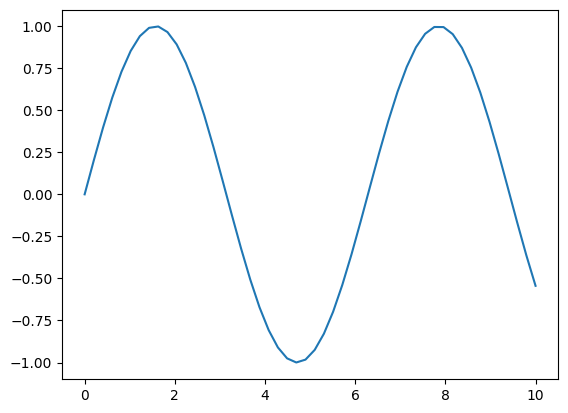

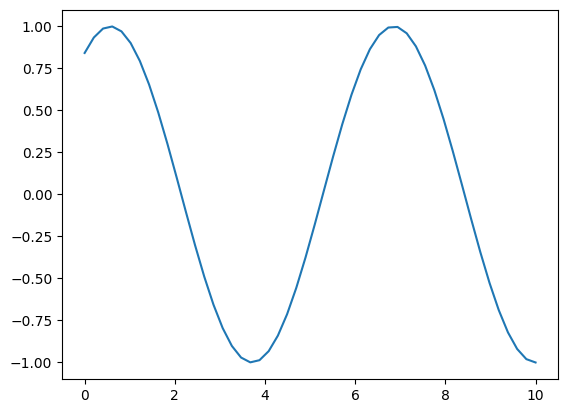

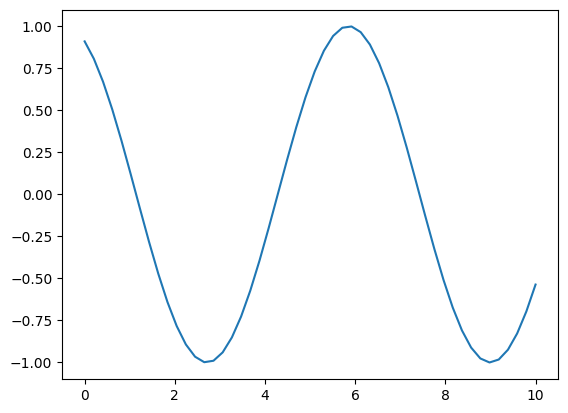

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline



import numpy as np

x = np.linspace( 0,10 )

for n in range(3):
    y = np.sin( x+n )
    plt.figure()
    plt.plot( x, y )

plt.show()

In [32]:
df_players_comp_long=pd.melt(df_players_comp,var_name='Stat_Name',value_name='Value')
df_players_comp_long

,Stat_Name,Value
0,Name,Lionel Messi
1,Name,Karim Benzema
2,Overall,90
3,Overall,90
4,Shooting,87
5,Shooting,88
6,Long,90
7,Long,76


In [ ]:
#player=input('Player?')
players_selected= df[df['Name']=='Kylian Mbappé']

fig=px.bar_polar(players_selected,r=players_selected.select_dtypes(include=int),theta=players_selected.select_dtypes(include=int),color=players_selected.Name)
fig.show()


In [ ]:
players_selected= df[(df['Name']=='Kylian Mbappé')|(df['Name']=='Lionel Messi')]
players_selected

In [ ]:
players_selected=players_selected.set_index('Name')

In [ ]:
px.bar(players_selected,color='Name',y=players_selected.Pace)

In [ ]:
int_df=players_selected.select_dtypes(include=int)
df3=int_df.transpose().reset_index()
df3

In [ ]:
df3.columns

In [ ]:

fig = px.line_polar(df3, r=df3['Lionel Messi'], theta=df3['index'], line_close=True)

fig.show()

In [ ]:
px.data.wind()

In [ ]:
df

In [ ]:
df_t=df.transpose()
df_t

# Radar one player

In [ ]:
# Choose the stats to plot
list_cat= df.select_dtypes(include=int).columns
list_cat

cat=['Passing','Overall']


In [ ]:
df2 = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df2, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
df2

In [ ]:
import plotly.graph_objects as go
import streamlit as st

In [ ]:
#categories= st.multiselect('Choose the categories to observe.')
categories= ['Overall','Pace','Shooting','Passing']
fig=go.Figure()
fig.add_trace(go.Scatterpolar(
    r=[5,6,3,7],
    theta=categories,
    fill='toself',
    name='Joeur A'
))

fig.add_trace(go.Scatterpolar(
    r=[10,2,5,12],
    theta=categories,
    fill='toself',
    name='Joeur B'
))



fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,15]
    )),
  showlegend=True
)
fig.show()

In [ ]:
categories=['Overall','Passing']
player='Lionel Messi'
def categories_to_plot(dataframe,categories:list,player:str):
    dataframe=dataframe[(dataframe[categories])&(dataframe['Name']==player)]
    return dataframe







In [ ]:
categories.append(player)
categories

In [ ]:
df[categories] 

In [ ]:
df.loc[df[df['Name']==player],categories]

In [ ]:
df[df['Name']==player]

In [ ]:
df

In [ ]:
df_new_index=df.set_index('Name')
df_new_index

In [ ]:
df_new_index.iloc['Lionel Messi']
                  

In [ ]:
df

In [ ]:
categories=['Overall','Pace']
player='Lionel Messi'


def plot_stat_player(player:str,categories:list):
    fig=px.bar(df,y=df[categories[0]])
    fig.show()





In [ ]:
plot_stat_player('Lionel Nessi',['Overall','Pace'])

In [ ]:
df[df['Name']==player]

In [ ]:
df_player=df[df['Name']==player]

In [ ]:
px.bar(df_player,x='Pace',y=df_player['Passing'])

# Wide to long format

In [ ]:
df_long= pd.melt(df, id_vars=['Name'],var_name='Stat_Name',value_name='Value')
df_long